Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection And Processing

In [2]:
# load data from csv
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
# show data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#data shape
gold_data.shape

(2290, 6)

In [8]:
#data info
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#check null value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [11]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

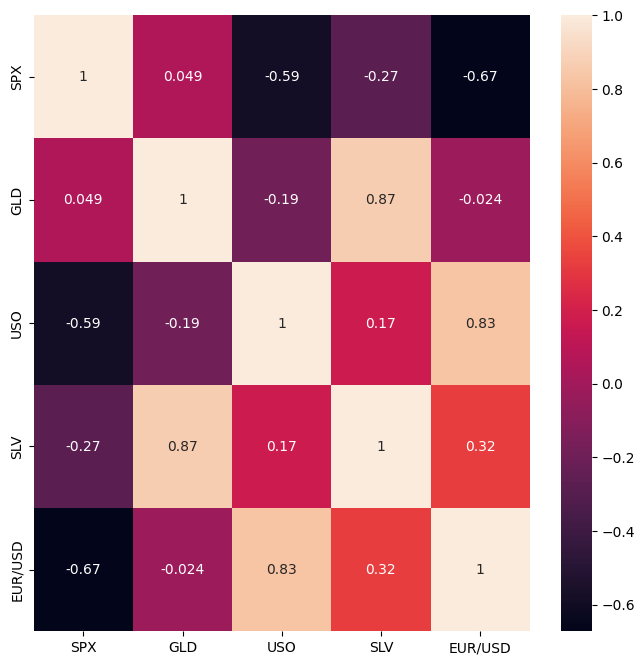

In [16]:
#heatmap for correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,annot=True)


In [17]:
#correlation value of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


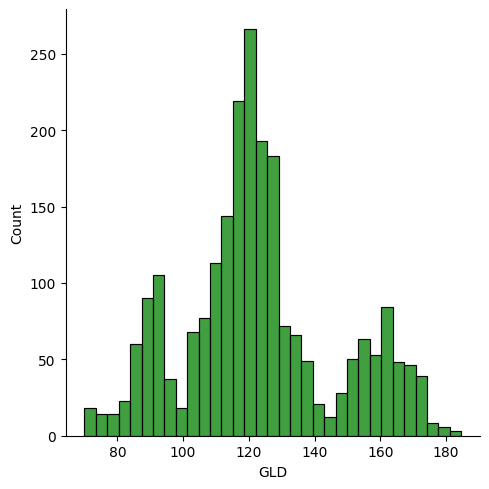

In [19]:
#distribution of gld
sns.displot(gold_data['GLD'],color='green')

Splitting Features and Target

In [20]:
X = gold_data.drop(['Date','GLD'],axis=1) #features
Y = gold_data['GLD'] #target

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting to train and test data

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2,)

Model Training: Random Forest Regressor

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [26]:
#predict on test data
test_data_predict = regressor.predict(X_test)

In [27]:
print(test_data_predict)

[168.66169954  81.9560999  115.95419999 127.69680079 120.83570108
 154.92269758 150.04459702 126.14610011 117.46949901 125.89150094
 116.64760082 171.89350018 141.58739889 167.98739836 115.1772003
 117.58620052 139.04790269 169.85830054 159.23090279 160.58629918
 154.89830057 125.14029999 175.89379893 157.11280395 125.15050054
  93.87049996  76.98150045 120.8540001  119.06019937 167.53010007
  88.15650013 125.23000038  91.10540086 117.62119997 121.02179893
 136.64750047 115.14300118 115.00410049 149.26839947 107.028301
 104.10470236  87.21749797 126.63100038 118.26289972 152.05039921
 119.65650002 108.29330006 108.06659872  93.14420038 127.30209724
  74.15200071 113.65909941 121.23000022 111.1809994  118.8997989
 120.17759963 160.4031005  166.79760145 147.08829772  85.92739877
  94.33760048  86.84559888  90.52869995 119.01710086 126.35880047
 127.59579991 169.46479959 122.33179931 117.50529895  98.60620037
 168.40100162 143.03529837 131.88150237 121.06720189 120.57649932
 119.69160045 

In [29]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_predict)
print("R Squared Error: ",error_score)

R Squared Error:  0.9892054488322303


Compare the actual and predict value in plot


In [32]:
Y_test = list(Y_test)

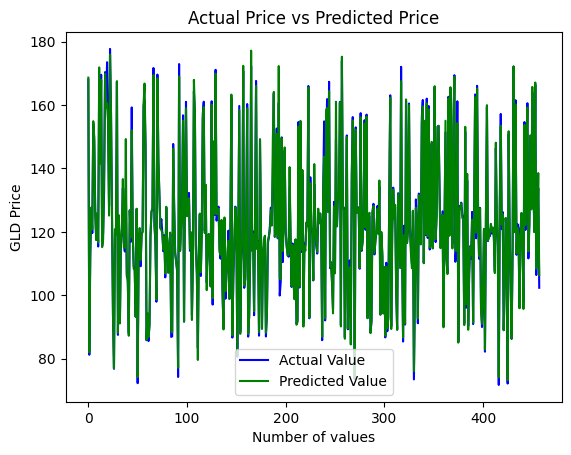

In [33]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_predict, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()